In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import urllib

pd.options.display.max_columns = 999

In [2]:
#Load in the Wikipedia table data
url = "https://en.wikipedia.org/wiki/Nationwide_opinion_polling_for_the_2024_United_States_presidential_election" 

html_content = urllib.request.urlopen(url).read()

# Parse the HTML content with BeautifulSoup

soup = BeautifulSoup(html_content, 'html5lib')
table_dat = soup.find_all('table')


In [3]:
rfk_table = table_dat[10]

rfk_table_data = []
for row in rfk_table.find_all('tr'):
    row_data = [cell.text.strip() for cell in row.find_all(['td','th'])]
    rfk_table_data.append(row_data)

#Convert table data to a dataframe
#We remove the first row since this is RCP summary data that we don't want to use
    
rfk = pd.DataFrame(rfk_table_data[1:], columns=rfk_table_data[0])

rfk["Year"] = rfk["Date"].str.split(" ").str[-1]
rfk["Month"] = rfk["Date"].str.split(" ").str[0]
rfk["Day"] = rfk["Date"].str.split(" ").str[1].str.split("–").str[0]
rfk["New Date"] = rfk["Month"] + " " + rfk["Day"] + ", " + rfk["Year"]
rfk["New Date"] = pd.to_datetime(rfk["New Date"],format="mixed")
rfk['JoeBidenDemocratic'] = rfk['JoeBidenDemocratic'].str.rstrip('%').astype('float') / 100
rfk['DonaldTrumpRepublican'] = rfk['DonaldTrumpRepublican'].str.rstrip('%').astype('float') / 100
rfk["Robert F.Kennedy Jr.Independent"] = rfk["Robert F.Kennedy Jr.Independent"].str.rstrip('%').astype('float') / 100
rfk.set_index("New Date", inplace=True)
rfk.drop("2023-10-09", inplace=True)
rfk["Spread"] = rfk["DonaldTrumpRepublican"] - rfk["JoeBidenDemocratic"]
rfk.head()

,Poll source,Date,Samplesize[b],Marginof error,JoeBidenDemocratic,DonaldTrumpRepublican,Robert F.Kennedy Jr.Independent,Other/Undecided,Year,Month,Day,Spread
New Date,,,,,,,,,,,,
2024-01-03,Reuters/Ipsos,"January 3–9, 2024","4,677 (RV)",± 1.5%,0.29,0.30,0.18,23%,2024,January,3,0.01
2023-12-14,Quinnipiac University,"December 14–18, 2023","1,647 (RV)",± 2.4%,0.38,0.36,0.22,4%,2023,December,14,-0.02
2023-12-06,Rasmussen Reports,"December 6–7 & 10, 2023",892 (LV),± 3.0%,0.32,0.40,0.16,12%[j],2023,December,6,0.08
2023-12-05,Cygnal (R),"December 5–7, 2023","2,000 (LV)",± 2.16%,0.42,0.43,0.09,6%,2023,December,5,0.01
2023-11-15,Harvard/Harris,"November 15–16, 2023","2,851 (RV)",–,0.36,0.44,0.21,0%,2023,November,15,0.08


In [4]:
jbdt_table_2023 = table_dat[8]
jbdt_table_2024 = table_dat[7]

jbdt_table_2023_data = []
for row in jbdt_table_2023.find_all('tr'):
    row_data = [cell.text.strip() for cell in row.find_all(['td','th'])]
    jbdt_table_2023_data.append(row_data)

jbdt_table_2024_data = []
for row in jbdt_table_2024.find_all('tr'):
    row_data = [cell.text.strip() for cell in row.find_all(['td','th'])]
    jbdt_table_2024_data.append(row_data)

    
jbdt_2023 = pd.DataFrame(jbdt_table_2023_data[1:], columns=jbdt_table_2023_data[0])
jbdt_2024 = pd.DataFrame(jbdt_table_2024_data[1:], columns=jbdt_table_2024_data[0])
jbdt = pd.concat([jbdt_2023, jbdt_2024])
jbdt["Year"] = jbdt["Date"].str.split(" ").str[-1]
jbdt["Month"] = jbdt["Date"].str.split(" ").str[0]
jbdt["Day"] = jbdt["Date"].str.split(" ").str[1].str.split("–").str[0]
jbdt['JoeBidenDemocratic'] = jbdt['JoeBidenDemocratic'].str[:2].astype('float') / 100
jbdt['DonaldTrumpRepublican'] = jbdt['DonaldTrumpRepublican'].str[:2].astype('float') / 100
jbdt["Spread"] = jbdt["DonaldTrumpRepublican"] - jbdt["JoeBidenDemocratic"]
jbdt["New Date"] = jbdt["Month"] + " " + jbdt["Day"] + ", " + jbdt["Year"]
jbdt["New Date"] = pd.to_datetime(jbdt["New Date"],format="mixed")
jbdt.head()

,Poll source,Date,Samplesize[b],Marginof error,JoeBidenDemocratic,DonaldTrumpRepublican,Other/Undecided,Year,Month,Day,Spread,New Date
0,ActiVote,"December 13–19, 2023",841 (LV),± 3.4%,0.46,0.54,–,2023,December,13,0.08,2023-12-13
1,McLaughlin & Associates,"December 13–19, 2023","1,000 (LV)",–,0.44,0.47,10%,2023,December,13,0.03,2023-12-13
2,The Economist/YouGov,"December 16–18, 2023","1,336 (RV)",± 3.2%,0.43,0.43,14%,2023,December,16,0.00,2023-12-16
3,YouGov/Yahoo News,"December 14–18, 2023","1,027 (RV)",–,0.44,0.44,12%,2023,December,14,0.00,2023-12-14
4,Quinnipiac University,"December 14–18, 2023","1,647 (RV)",± 2.4%,0.47,0.46,6%,2023,December,14,-0.01,2023-12-14


In [5]:
# Merge the two dataframes on new data

merged = pd.merge(rfk, jbdt, on="New Date", suffixes=('_RFK', '_JBDT'))
merged.head()

,New Date,Poll source_RFK,Date_RFK,Samplesize[b]_RFK,Marginof error_RFK,JoeBidenDemocratic_RFK,DonaldTrumpRepublican_RFK,Robert F.Kennedy Jr.Independent,Other/Undecided_RFK,Year_RFK,Month_RFK,Day_RFK,Spread_RFK,Poll source_JBDT,Date_JBDT,Samplesize[b]_JBDT,Marginof error_JBDT,JoeBidenDemocratic_JBDT,DonaldTrumpRepublican_JBDT,Other/Undecided_JBDT,Year_JBDT,Month_JBDT,Day_JBDT,Spread_JBDT
0,2024-01-03,Reuters/Ipsos,"January 3–9, 2024","4,677 (RV)",± 1.5%,0.29,0.30,0.18,23%,2024,January,3,0.01,Reuters/Ipsos,"January 3–9, 2024","4,677 (A)",± 1.5%,0.48,0.48,4%,2024,January,3,0.00
1,2024-01-03,Reuters/Ipsos,"January 3–9, 2024","4,677 (RV)",± 1.5%,0.29,0.30,0.18,23%,2024,January,3,0.01,I&I/TIPP,"January 3–5, 2024","1,247 (RV)",± 2.8%,0.40,0.41,19%,2024,January,3,0.01
2,2023-12-14,Quinnipiac University,"December 14–18, 2023","1,647 (RV)",± 2.4%,0.38,0.36,0.22,4%,2023,December,14,-0.02,YouGov/Yahoo News,"December 14–18, 2023","1,027 (RV)",–,0.44,0.44,12%,2023,December,14,0.00
3,2023-12-14,Quinnipiac University,"December 14–18, 2023","1,647 (RV)",± 2.4%,0.38,0.36,0.22,4%,2023,December,14,-0.02,Quinnipiac University,"December 14–18, 2023","1,647 (RV)",± 2.4%,0.47,0.46,6%,2023,December,14,-0.01
4,2023-12-06,Rasmussen Reports,"December 6–7 & 10, 2023",892 (LV),± 3.0%,0.32,0.40,0.16,12%[j],2023,December,6,0.08,Rasmussen Reports,"December 6–10, 2023",892 (LV),± 3.0%,0.38,0.48,14%[f],2023,December,6,0.10


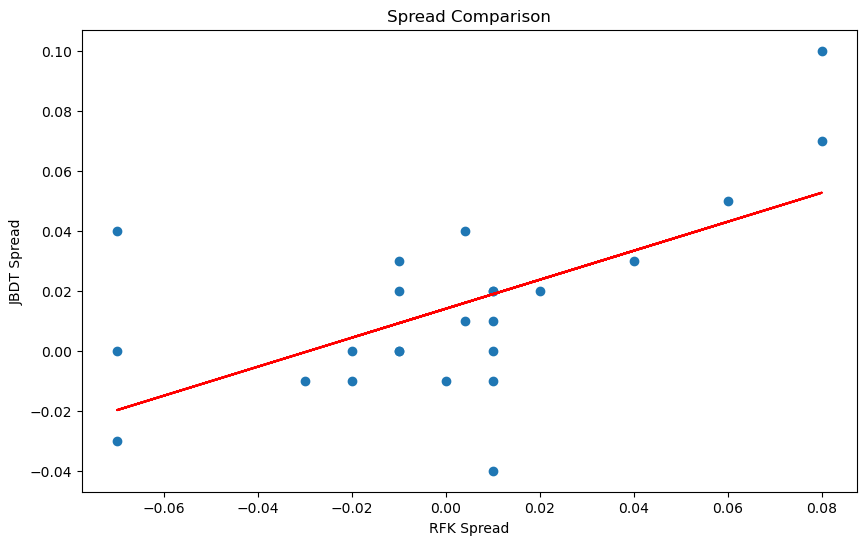

In [6]:
#Scatterplot the two different spreads

plt.figure(figsize=(10,6))
plt.scatter(merged["Spread_RFK"], merged["Spread_JBDT"])
# add trendline

z = np.polyfit(merged["Spread_RFK"], merged["Spread_JBDT"], 1)
p = np.poly1d(z)
plt.plot(merged["Spread_RFK"],p(merged["Spread_RFK"]), color="red")
plt.title("Spread Comparison")
plt.xlabel("RFK Spread")
plt.ylabel("JBDT Spread")
plt.show()

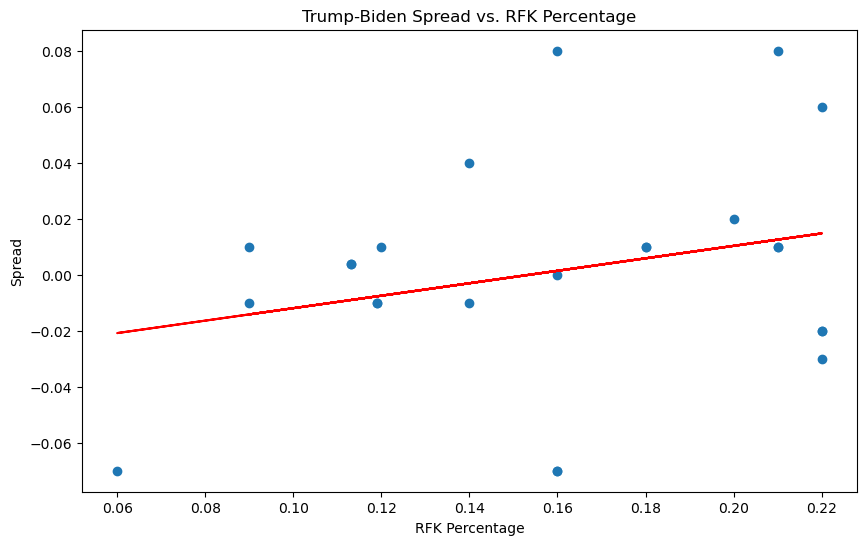

In [7]:
#Just scatter the RFK percentage with the spread

plt.figure(figsize=(10,6))
plt.scatter(merged["Robert F.Kennedy Jr.Independent"], merged["Spread_RFK"])
plt.title("Trump-Biden Spread vs. RFK Percentage")
# add trendline

z = np.polyfit(merged["Robert F.Kennedy Jr.Independent"], merged["Spread_RFK"], 1)
p = np.poly1d(z)
plt.plot(merged["Robert F.Kennedy Jr.Independent"],p(merged["Robert F.Kennedy Jr.Independent"]), color="red")

plt.xlabel("RFK Percentage")
plt.ylabel("Spread")
plt.show()

In [57]:
# Make the same scatter plot but much better looking

fig = px.scatter(merged, x="Robert F.Kennedy Jr.Independent", y="Spread_RFK", trendline="ols", title="Trump-Biden Spread vs. RFK Percentage")
fig.update_layout(
    title="Trump-Biden Spread vs. RFK Percentage",
    xaxis_title="RFK Percentage",
    yaxis_title="Trump-Biden Spread",
)
fig.show()

In [52]:
#Investigate what's going on with undecided voters
#How does the undecided percentage relate to the number of candidates on the ballot?

cw_table = table_dat[12]

cw_table_data = []
for row in cw_table.find_all('tr'):
    row_data = [cell.text.strip() for cell in row.find_all(['td','th'])]
    cw_table_data.append(row_data)

#Convert table data to a dataframe
#We remove the first row since this is RCP summary data that we don't want to use
    
cw = pd.DataFrame(cw_table_data[1:], columns=cw_table_data[0])

cw["Year"] = cw["Date"].str.split(" ").str[-1]
cw["Month"] = cw["Date"].str.split(" ").str[0]
cw["Day"] = cw["Date"].str.split(" ").str[1].str.split("–").str[0]
cw["New Date"] = cw["Month"] + " " + cw["Day"] + ", " + cw["Year"]
cw["New Date"] = pd.to_datetime(cw["New Date"],format="mixed")
cw['JoeBidenDemocratic'] = cw['JoeBidenDemocratic'].str.rstrip('%').astype('float') / 100
cw['DonaldTrumpRepublican'] = cw['DonaldTrumpRepublican'].str.rstrip('%').astype('float') / 100
cw["Robert F.Kennedy Jr.Independent"] = cw["Robert F.Kennedy Jr.Independent"].str.rstrip('%').astype('float') / 100
cw["CornelWestIndependent"] = cw["CornelWestIndependent"].str.rstrip('%').astype('float') / 100

cw.set_index("New Date", inplace=True)
cw.drop(["2023-10-05","2023-10-09"], inplace=True)
cw["Other/Undecided"] = np.float32(1 - cw["JoeBidenDemocratic"] - cw["DonaldTrumpRepublican"] - cw["Robert F.Kennedy Jr.Independent"] - cw["CornelWestIndependent"])
cw["Spread"] = cw["DonaldTrumpRepublican"] - cw["JoeBidenDemocratic"]
cw

,Poll source,Date,Samplesize[b],Marginof error,JoeBidenDemocratic,DonaldTrumpRepublican,Robert F.Kennedy Jr.Independent,CornelWestIndependent,Other/Undecided,Year,Month,Day,Spread
New Date,,,,,,,,,,,,,
2023-11-29,SSRS/CNN,"November 29 – December 6, 2023","1,197 (RV)",± 3.4%,0.310,0.390,0.200,0.060,4.000000e-02,2023,November,29,0.080
2023-11-22,HarrisX,"November 22–28, 2023","4,003 (RV)",–,0.330,0.410,0.130,0.020,1.100000e-01,2023,November,22,0.080
2023-11-15,HarrisX/The Messenger,"November 15–19, 2023","3,017 (LV)",± 1.8%,0.330,0.400,0.140,0.020,1.100000e-01,2023,November,15,0.070
2023-10-30,Big Village,"October 30 – November 5, 2023","1,497 (LV)",± 2.2%,0.371,0.401,0.124,0.017,8.700000e-02,2023,October,30,0.030
2023-10-27,CNN/SSRS,"October 27 – November 2, 2023","1,271 (RV)",± 3.1%,0.350,0.410,0.160,0.040,4.000000e-02,2023,October,27,0.060
2023-10-30,HarrisX/The Messenger,"October 30 – November 1, 2023","2,021 (RV)",± 2.2%,0.360,0.410,0.110,0.020,1.000000e-01,2023,October,30,0.050
2023-10-26,Quinnipiac University,"October 26–30, 2023","1,610 (RV)",± 2.4%,0.360,0.350,0.190,0.060,4.000000e-02,2023,October,26,-0.010
2023-10-23,McLaughlin and Associates (R),"October 23–26, 2023",449 (LV),± 3.1%,0.350,0.380,0.120,0.020,1.300000e-01,2023,October,23,0.030
2023-10-16,Harris X/The Messenger,"October 16–23, 2023","3,029 (RV)",± 1.8%,0.350,0.380,0.130,0.020,1.200000e-01,2023,October,16,0.030
